<a href="https://colab.research.google.com/github/cyberone1812/CMUDeepLearning/blob/main/dele_rnn_w7_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Recurrent Node

Compared to a convential neuron, our recurrent neuron will take in an output from the layer itself.  

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png />
</center>



### A Basic Sequence of Stock Prices



In [ ]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
apple = pd.read_csv('AAPL.csv', index_col = 0)

In [ ]:
#take a peek
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


In [ ]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,191.639999,191.679993,188.380005,191.240005,191.240005,27862000
2019-04-02,191.089996,194.460007,191.050003,194.020004,194.020004,22765700
2019-04-03,193.250000,196.500000,193.149994,195.350006,195.350006,23271800
2019-04-04,194.789993,196.369995,193.139999,195.690002,195.690002,19099200
2019-04-05,196.449997,197.100006,195.949997,197.000000,197.000000,18526644


In [ ]:
# apple.to_csv('appl.csv')

<Axes: xlabel='Date'>

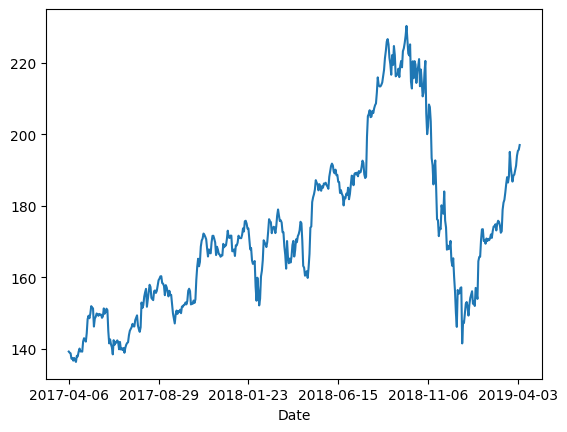

In [ ]:
#plot the adjusted close
apple['Adj Close'].plot()

<Axes: xlabel='Date'>

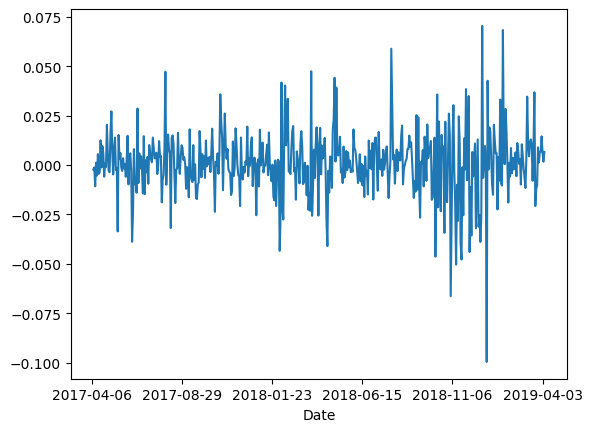

In [ ]:
#look at the percent change
apple['Adj Close'].pct_change().plot()

<Axes: xlabel='Date'>

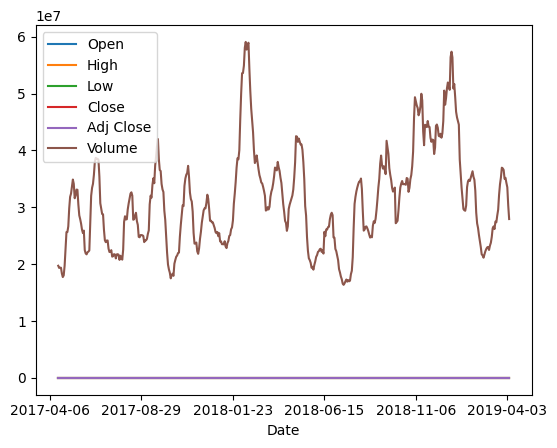

In [ ]:
apple.rolling(window = 10).mean().plot()

In [ ]:
#determine X and y
apple_pchange = apple.pct_change().dropna()
X = apple_pchange[['High', 'Low', 'Open', 'Volume']]
y2 = apple_pchange['Adj Close']
#typical arima -- X = apple_pchange.shift(1)


In [ ]:
y = np.where(y2 > 0, 1, 0) #making a classification problem

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [ ]:
X_train.tail()

,High,Low,Open,Volume
Date,,,,
2018-09-27,0.012022,0.017201,0.012760,0.258352
2018-09-28,-0.002650,0.002147,0.004334,-0.240275
2018-10-01,0.015852,0.010401,0.014058,0.029281
2018-10-02,0.002528,0.001237,-0.003071,0.050312
2018-10-03,0.015087,0.013899,0.012321,0.155986


In [ ]:
X_test.head()

,High,Low,Open,Volume
Date,,,,
2018-10-04,-0.004797,-0.013274,0.003173,0.118207
2018-10-05,-0.016957,-0.027125,-0.012219,0.048015
2018-10-08,-0.015805,-0.001723,-0.025224,-0.116633
2018-10-09,0.010988,0.009310,0.006435,-0.093477
2018-10-10,-0.004048,-0.027896,0.008138,0.561511


### Scaling
------

Per usual we need to scale our data for the network.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#instantiate
sscaler = StandardScaler()

In [ ]:
#fit and transform
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

### `TimeSeriesGenerator`
-------
This creates stacks of sequenced data of which we specify the length of the sequences desired.

In [ ]:
X_train_scaled

array([[-0.31501537, -0.19680477, -0.38236103, -0.67993705],
       [-0.29183909, -0.29749229, -0.1641142 ,  0.1897112 ],
       [-0.42840186, -1.60864377, -0.43479013,  1.36386165],
       ...,
       [ 1.23590363,  0.68700255,  0.93289361, -0.07657681],
       [ 0.10079905, -0.00786251, -0.32295623, -0.02391638],
       [ 1.17073229,  0.95227606,  0.80558592,  0.24068863]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
train_sequences = TimeseriesGenerator(X_train_scaled, y_train, length = 3)

In [ ]:
list(train_sequences)[0]

(array([[[-0.31501537, -0.19680477, -0.38236103, -0.67993705],
         [-0.29183909, -0.29749229, -0.1641142 ,  0.1897112 ],
         [-0.42840186, -1.60864377, -0.43479013,  1.36386165]],
 
        [[-0.29183909, -0.29749229, -0.1641142 ,  0.1897112 ],
         [-0.42840186, -1.60864377, -0.43479013,  1.36386165],
         [-0.82775433,  0.41265522, -0.78514129, -0.97655671]],
 
        [[-0.42840186, -1.60864377, -0.43479013,  1.36386165],
         [-0.82775433,  0.41265522, -0.78514129, -0.97655671],
         [ 0.02326972, -0.08014767,  0.06271156, -0.46084552]],
 
        ...,
 
        [[ 0.76027962,  0.68913119,  0.16467724, -0.01081246],
         [-0.08717531,  0.14936909,  0.27788145, -0.60592106],
         [ 0.56481549,  0.35459769,  0.29961715, -0.31455488]],
 
        [[-0.08717531,  0.14936909,  0.27788145, -0.60592106],
         [ 0.56481549,  0.35459769,  0.29961715, -0.31455488],
         [ 0.5757545 , -0.29184981,  0.01983914, -0.24934498]],
 
        [[ 0.56481549,  0

In [ ]:
test_sequences = TimeseriesGenerator(X_test_scaled, y_test, length = 3)

In [ ]:
train_sequences.data.shape

(376, 4)

In [ ]:
train_sequences.targets[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

### Model with `SimpleRNN`
--------

- 1 `SimpleRNN` layer
- 1 hidden `Dense` layer

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

In [ ]:
#build the network
model1 = Sequential()
model1.add(SimpleRNN(16, activation = 'tanh' ))
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compilation
model1.compile(loss = 'bce',   #loss_fn = nn.BCELoss()
               optimizer = "adam",
               metrics = ['accuracy'])

In [ ]:
#fit it
history = model1.fit(train_sequences,
                     validation_data=test_sequences,
                     epochs = 10,
                     batch_size = 10)

Epoch 1/10
3/3 [==============================] - 3s 258ms/step - loss: 0.7012 - accuracy: 0.4826 - val_loss: 0.6858 - val_accuracy: 0.5854
Epoch 2/10
3/3 [==============================] - 0s 64ms/step - loss: 0.6955 - accuracy: 0.4826 - val_loss: 0.6856 - val_accuracy: 0.5854
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4960 - val_loss: 0.6854 - val_accuracy: 0.5935
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6894 - accuracy: 0.4879 - val_loss: 0.6862 - val_accuracy: 0.5447
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6873 - accuracy: 0.5013 - val_loss: 0.6874 - val_accuracy: 0.5366
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.6856 - accuracy: 0.5174 - val_loss: 0.6889 - val_accuracy: 0.5447
Epoch 7/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6839 - accuracy: 0.5121 - val_loss: 0.6907 - val_accuracy: 0.5528
Epoch 8/10
3/3 [==========

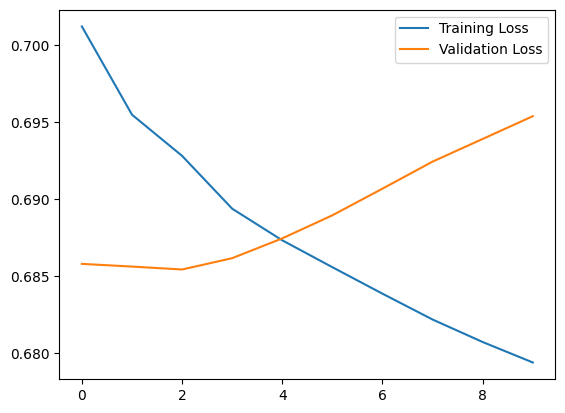

In [ ]:
#loss?
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend();

In [ ]:
y_test.mean()

0.5476190476190477

### The `LSTM` and `GRU` layers

In [ ]:
#network with LSTM
model2 = Sequential()
model2.add(LSTM(16, activation = 'tanh'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model2.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#fit
history = model2.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
3/3 [==============================] - 3s 241ms/step - loss: 0.6959 - accuracy: 0.4799 - val_loss: 0.6954 - val_accuracy: 0.5122
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6937 - accuracy: 0.5282 - val_loss: 0.6934 - val_accuracy: 0.5122
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5362 - val_loss: 0.6920 - val_accuracy: 0.5122
Epoch 4/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6914 - accuracy: 0.5201 - val_loss: 0.6910 - val_accuracy: 0.5366
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6906 - accuracy: 0.5282 - val_loss: 0.6900 - val_accuracy: 0.5691
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6899 - accuracy: 0.5335 - val_loss: 0.6894 - val_accuracy: 0.5691
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6894 - accuracy: 0.5389 - val_loss: 0.6888 - val_accuracy: 0.5691
Epoch 8/10
3/3 [==========

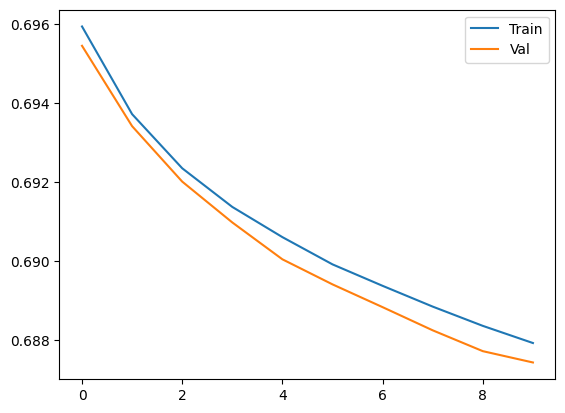

In [ ]:
#examine the loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.legend();

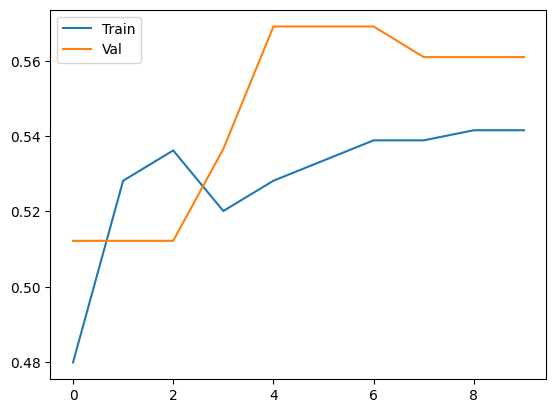

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#GRU layer
model3 = Sequential()
model3.add(GRU(16, activation = 'tanh'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model3.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#train_sequences.targets

In [ ]:
#fit
history = model3.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
3/3 [==============================] - 3s 248ms/step - loss: 0.6952 - accuracy: 0.5147 - val_loss: 0.6850 - val_accuracy: 0.5610
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6930 - accuracy: 0.5389 - val_loss: 0.6847 - val_accuracy: 0.5772
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.5362 - val_loss: 0.6847 - val_accuracy: 0.5691
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 0.6909 - accuracy: 0.5416 - val_loss: 0.6848 - val_accuracy: 0.5610
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6901 - accuracy: 0.5416 - val_loss: 0.6848 - val_accuracy: 0.5610
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6894 - accuracy: 0.5416 - val_loss: 0.6850 - val_accuracy: 0.5610
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 0.6887 - accuracy: 0.5416 - val_loss: 0.6851 - val_accuracy: 0.5610
Epoch 8/10
3/3 [==========

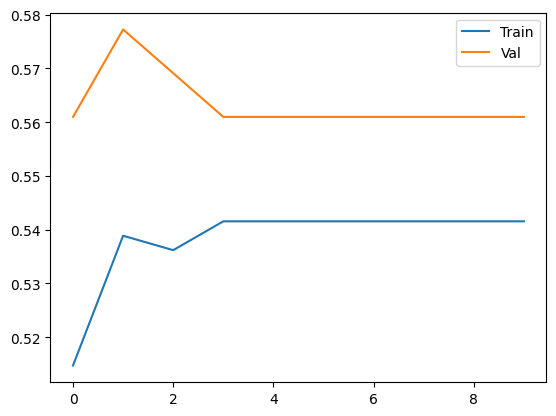

In [ ]:
#examine the loss
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#stacking layers
model4 = Sequential()
model4.add(GRU(32, return_sequences = True))
model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce', metrics = ['accuracy'])
history = model4.fit(train_sequences, validation_data = test_sequences, epochs = 50, verbose = 0)

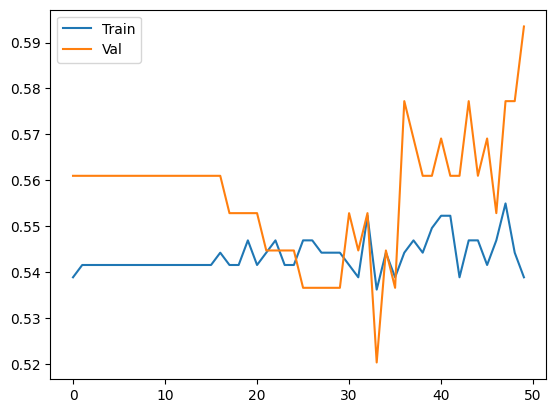

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

### Sequential Models for Text
-------

Now, we use the Keras `Tokenizer` to preprocess our spam data and feed it through different architectures of sequential network models.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
spam = pd.read_csv('sms_spam.csv')

In [ ]:
spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### `Tokenizer`
------
Here, we set the limit to the number of words at 500, then fit the texts, and finally transform our text to sequences of integer values with the `.texts_to_sequences`.  To assure the same length we use the `pad_sequences` function.  

In [ ]:
#create a tokenizer and specify the vocabulary
tokenizer = Tokenizer(500)

In [ ]:
#fit it on text
tokenizer.fit_on_texts(spam['text'])

In [ ]:
#generate sequences
sequences = tokenizer.texts_to_sequences(spam['text'])

In [ ]:
sequences[:3]

[[122, 3, 22, 313, 4, 53, 110, 37, 8],
 [92, 134, 86, 11, 170],
 [60, 179, 155, 8, 62, 24, 17, 2, 387]]

In [ ]:
lengths = [len(seq) for seq in sequences]
max(lengths)

162

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
#pad sequences to 100
X = pad_sequences(sequences, maxlen = 100)

In [ ]:
#take a peek
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       122,   3,  22, 313,   4,  53, 110,  37,   8], dtype=int32)

In [ ]:
X.shape

(5559, 100)

### Model
-------

In [ ]:
from keras.layers import Embedding

In [ ]:
#sequential model
text_model1 = Sequential()
#embedding layer
text_model1.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
#simple RNN
text_model1.add(SimpleRNN(16))
#dense layer
text_model1.add(Dense(20, activation = 'relu'))
#output
text_model1.add(Dense(1, activation = 'sigmoid'))
#compilation
text_model1.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#make y binary
y = np.where(spam['type'] == 'ham', 0, 1)

In [ ]:
#baseline?
1 - np.mean(y)

0.8656233135456017

In [ ]:
#fit it
history = text_model1.fit(X, y, validation_split = .2, epochs = 10, batch_size = 24)

Epoch 1/10
186/186 [==============================] - 5s 21ms/step - loss: 0.2357 - accuracy: 0.9260 - val_loss: 0.0882 - val_accuracy: 0.9739
Epoch 2/10
186/186 [==============================] - 4s 23ms/step - loss: 0.0688 - accuracy: 0.9784 - val_loss: 0.0583 - val_accuracy: 0.9856
Epoch 3/10
186/186 [==============================] - 4s 23ms/step - loss: 0.0482 - accuracy: 0.9870 - val_loss: 0.0562 - val_accuracy: 0.9820
Epoch 4/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0394 - accuracy: 0.9892 - val_loss: 0.0769 - val_accuracy: 0.9757
Epoch 5/10
186/186 [==============================] - 4s 22ms/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 0.0600 - val_accuracy: 0.9829
Epoch 6/10
186/186 [==============================] - 4s 22ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0631 - val_accuracy: 0.9820
Epoch 7/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0241 - accuracy: 0.9939 - val_loss: 0.0745 - val_accuracy: 0.9793

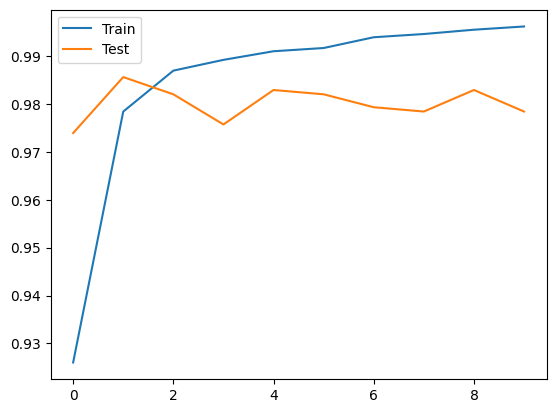

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.legend();

### Improving the Model
-----

- `LSTM` layers
- `GRU` layers
- `recurrent_dropout`
- `dropout`
- `Bidirectional` layers

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split = 0.2, epochs = 10)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split=.2, epochs = 10)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(Bidirectional(GRU(16)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split = 0.2, epochs = 10)

Epoch 1/10
139/139 [==============================] - 14s 75ms/step - loss: 0.2653 - acc: 0.9083 - val_loss: 0.0642 - val_acc: 0.9820
Epoch 2/10
139/139 [==============================] - 9s 67ms/step - loss: 0.0525 - acc: 0.9847 - val_loss: 0.0555 - val_acc: 0.9820
Epoch 3/10
139/139 [==============================] - 8s 59ms/step - loss: 0.0381 - acc: 0.9899 - val_loss: 0.0534 - val_acc: 0.9811
Epoch 4/10
139/139 [==============================] - 9s 68ms/step - loss: 0.0290 - acc: 0.9928 - val_loss: 0.0573 - val_acc: 0.9838
Epoch 5/10
139/139 [==============================] - 9s 68ms/step - loss: 0.0232 - acc: 0.9942 - val_loss: 0.0551 - val_acc: 0.9856
Epoch 6/10
139/139 [==============================] - 9s 62ms/step - loss: 0.0191 - acc: 0.9955 - val_loss: 0.0567 - val_acc: 0.9829
Epoch 7/10
139/139 [==============================] - 9s 66ms/step - loss: 0.0155 - acc: 0.9964 - val_loss: 0.0581 - val_acc: 0.9829
Epoch 8/10
139/139 [==============================] - 9s 67ms/step -

### Convolutional Networks in 1D
--------

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(Conv1D(32, 10, activation = 'relu'))
model.add(MaxPooling1D(4))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', metrics = ['acc'])

In [ ]:
Y = y.reshape(-1, 1)

In [ ]:
model.fit(X, Y, epochs = 10)

Epoch 1/10
174/174 [==============================] - 3s 13ms/step - loss: 0.4092 - acc: 0.8611
Epoch 2/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3809 - acc: 0.8729
Epoch 3/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3680 - acc: 0.8782
Epoch 4/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3629 - acc: 0.8800
Epoch 5/10
174/174 [==============================] - 3s 18ms/step - loss: 0.3609 - acc: 0.8808
Epoch 6/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3584 - acc: 0.8815
Epoch 7/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3575 - acc: 0.8820
Epoch 8/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3564 - acc: 0.8822
Epoch 9/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3552 - acc: 0.8826
Epoch 10/10
174/174 [==============================] - 3s 19ms/step - loss: 0.3548 - acc: 0.8830


In [ ]:
# model.save('a.h5')

AttributeError: 'Sequential' object has no attribute 'save_model'